<a href="https://colab.research.google.com/github/JMartinRutgers/API-Basic/blob/main/map_crime_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

In [ ]:
df = pd.read_csv('/content/crime_data.csv',  sep = r'\s*,\s*', engine = 'python') #https://data.nj.gov/resource/kie7-5sud.json
df

,state,crime,latitude,longitude,location
0,Aguascalientes,42322,21.881800,-102.291600,POINT(-102.2916 21.8818)
1,Morelos,46356,18.681300,-99.101300,POINT(-99.1013 18.6813)
2,Colima,28075,19.245200,-103.724900,POINT(-103.7249 19.2452)
3,Querétaro,63420,20.588100,-100.389900,POINT(-100.3899 20.5881)
4,Chiapas,15095,16.756900,-93.129200,POINT(-93.1292 16.7569)
5,Quintana Roo,54327,19.181700,-88.479100,POINT(-88.4791 19.1817)
6,Chihuahua,73966,28.635300,-106.088900,POINT(-106.0889 28.6353)
7,San Luis Potosí,60760,22.149800,-100.979000,POINT(-100.9790 22.1498)
8,Ciudad de México,234474,19.432600,-99.133200,POINT(-99.1332 19.4326)
9,Sinaloa,33645,25.172100,-107.479500,POINT(-107.4795 25.1721)


In [ ]:
df.rename(columns = {'location':'geometry'}, inplace = True)

In [ ]:
df_geo = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.longitude,df.latitude))
df


,state,crime,latitude,longitude,geometry
0,Aguascalientes,42322,21.881800,-102.291600,POINT(-102.2916 21.8818)
1,Morelos,46356,18.681300,-99.101300,POINT(-99.1013 18.6813)
2,Colima,28075,19.245200,-103.724900,POINT(-103.7249 19.2452)
3,Querétaro,63420,20.588100,-100.389900,POINT(-100.3899 20.5881)
4,Chiapas,15095,16.756900,-93.129200,POINT(-93.1292 16.7569)
5,Quintana Roo,54327,19.181700,-88.479100,POINT(-88.4791 19.1817)
6,Chihuahua,73966,28.635300,-106.088900,POINT(-106.0889 28.6353)
7,San Luis Potosí,60760,22.149800,-100.979000,POINT(-100.9790 22.1498)
8,Ciudad de México,234474,19.432600,-99.133200,POINT(-99.1332 19.4326)
9,Sinaloa,33645,25.172100,-107.479500,POINT(-107.4795 25.1721)


In [ ]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-36-c734f8c498f7>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<function matplotlib.pyplot.show(close=None, block=None)>

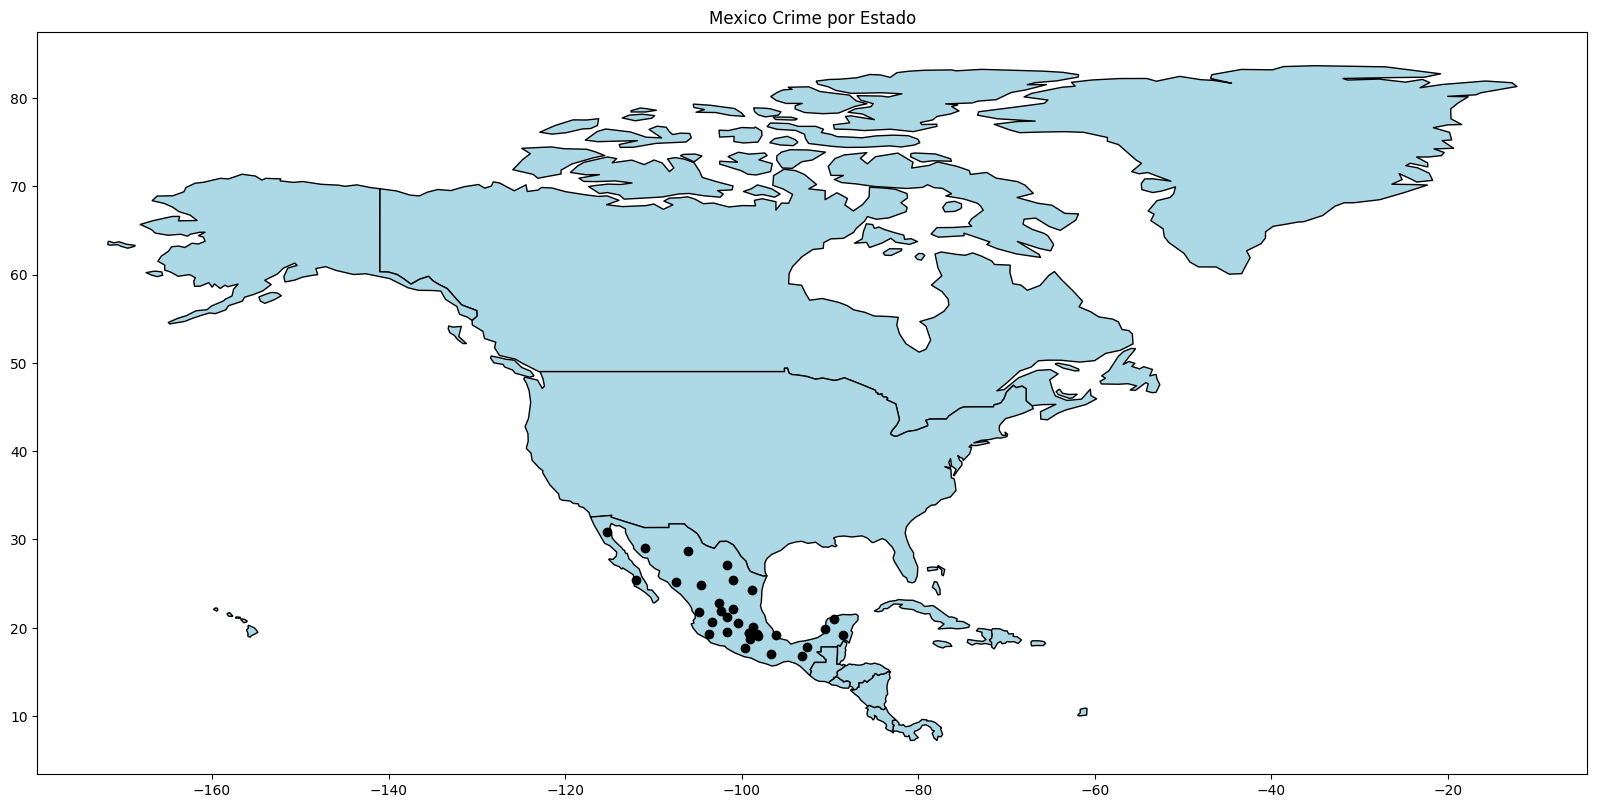

In [ ]:
axis = world_data[world_data.continent == 'North America'].plot(color = 'lightblue', edgecolor = 'black')

df_geo.plot(ax=axis, color='black')
plt.title('Mexico Crime por Estado')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches((20, 15))
fig.savefig('Mexico.png', dpi=200)
plt.show

In [ ]:
 df.rename(columns = {'state':'estado'}, inplace = True)

In [ ]:
df

,estado,crime,latitude,longitude,geometry
0,Aguascalientes,42322,21.881800,-102.291600,POINT(-102.2916 21.8818)
1,Morelos,46356,18.681300,-99.101300,POINT(-99.1013 18.6813)
2,Colima,28075,19.245200,-103.724900,POINT(-103.7249 19.2452)
3,Querétaro,63420,20.588100,-100.389900,POINT(-100.3899 20.5881)
4,Chiapas,15095,16.756900,-93.129200,POINT(-93.1292 16.7569)
5,Quintana Roo,54327,19.181700,-88.479100,POINT(-88.4791 19.1817)
6,Chihuahua,73966,28.635300,-106.088900,POINT(-106.0889 28.6353)
7,San Luis Potosí,60760,22.149800,-100.979000,POINT(-100.9790 22.1498)
8,Ciudad de México,234474,19.432600,-99.133200,POINT(-99.1332 19.4326)
9,Sinaloa,33645,25.172100,-107.479500,POINT(-107.4795 25.1721)


In [ ]:
# df['estado'] = df['estado'].str.capitalize()
# df

In [61]:

import plotly.express as px
import requests
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
#Archivo GeoJSON
mx_regions_geo = requests.get(repo_url).json()


# df = pd.DataFrame({'estado': data['estado'].values(), 'percentage':   data['percentage'].values()})
#df['estado'] = df['estado'].str.capitalize()

fig = px.choropleth(data_frame=df,
                    geojson=mx_regions_geo,
                    locations=df['estado'], # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    # color=df['percentage'], #El color depende de las cantidades
                    color=df['crime'], #El color depende de las cantidades
                    color_continuous_scale="burg",
                    #scope="north america"
                    title="Mexico Crime by Estados. Jorge Melchor Data Scien-Inegi"
                   )

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.write_html("/content/mexico3.html")
fig.show()
